In [ ]:
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import marsilea as ma
import marsilea.plotter as mp
# plt.rcParams['figure.dpi'] = 150
font_dirs = ["/public/home/mowp/test/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
sns.despine(top=True, right=True)
from itertools import product
from functools import reduce
import patchworklib as pw
from jpy_tools.otherTools import pwRecoverSeaborn, pwStack, F, pwShow
pw.show = pwShow
fc_recoverSns = pwRecoverSeaborn()
import seaborn.objects as so
from cycler import cycler
dt_snsStyle = {**sns.axes_style('ticks'), "legend.frameon": False, "axes.spines.top":False, "axes.spines.right":False, "axes.prop_cycle":cycler(color=['grey'])}
so.Plot.config.theme.update(dt_snsStyle)

<Figure size 640x480 with 0 Axes>

In [ ]:
import scanpy as sc
import muon as mu
import pandas as pd
import numpy as np
import scipy.sparse as ss
from tqdm import tqdm
from loguru import logger

In [ ]:
import pyranges as pr

In [ ]:
from jpy_tools import singleCellTools

Global seed set to 0


In [ ]:
import seaborn.objects as so

dt_snsStyle = {
    **sns.axes_style("ticks"),
    "axes.spines.top": False,
    "axes.spines.right": False,
}

In [ ]:
dir_result = "/data/Zhaijx/liuzj/projects/circadian/03_analysis/"
dir_temp = "/data/Zhaijx/liuzj/projects/singleCell/02_jupyter/circadian/20221122/"

In [ ]:
# md = loadPkl('md_20220829_after_diffxpy_marker', lambda **dt:mu.read_h5mu(**dt), arg_path='filename', dir_path=dir_temp)
# ad = md['all']

In [ ]:
ls_sample = [8, 10, 12, 14, 16, 18, 20, 22, 24, 2, 4, 6] | F(map, str) | F(list)

In [ ]:
dt_sample2Phase = {x: y for x, y in zip(ls_sample, range(0, 26, 2))}
dt_phase2Sample = {y: x for x, y in dt_sample2Phase.items()}

In [ ]:
dt_sample2Ct = {x: y for x, y in zip(ls_sample, range(48, 72, 2))}

In [ ]:
ad = loadPkl('ad_for_test_clustering_performance', lambda **dt:sc.read_h5ad(**dt), arg_path='filename', dir_path=dir_temp)

# For Each Samples

In [ ]:
dtAd = {}
for ct, _ad in singleCellTools.basic.splitAdata(ad, 'CT', needName=True):
    _ad.X = _ad.layers['sx'].copy()
    sc.experimental.pp.highly_variable_genes(_ad, layer='sx', n_top_genes=3000)
    sc.experimental.pp.normalize_pearson_residuals_pca(_ad)
    sc.pp.neighbors(_ad, n_pcs=30)
    sc.tl.umap(_ad, min_dist=0.3)
    sc.tl.leiden(_ad)
    dtAd[ct] = _ad
_ad = sc.concat(dtAd)

100%|██████████| 12/12 [13:49<00:00, 69.12s/it]


In [ ]:
ad.obsm['X_umap_each_cluster'] = _ad[ad.obs.index].obsm['X_umap'].copy()

In [ ]:
ad.obs['leiden_each_cluster'] = _ad[ad.obs.index].obs['leiden'].copy()

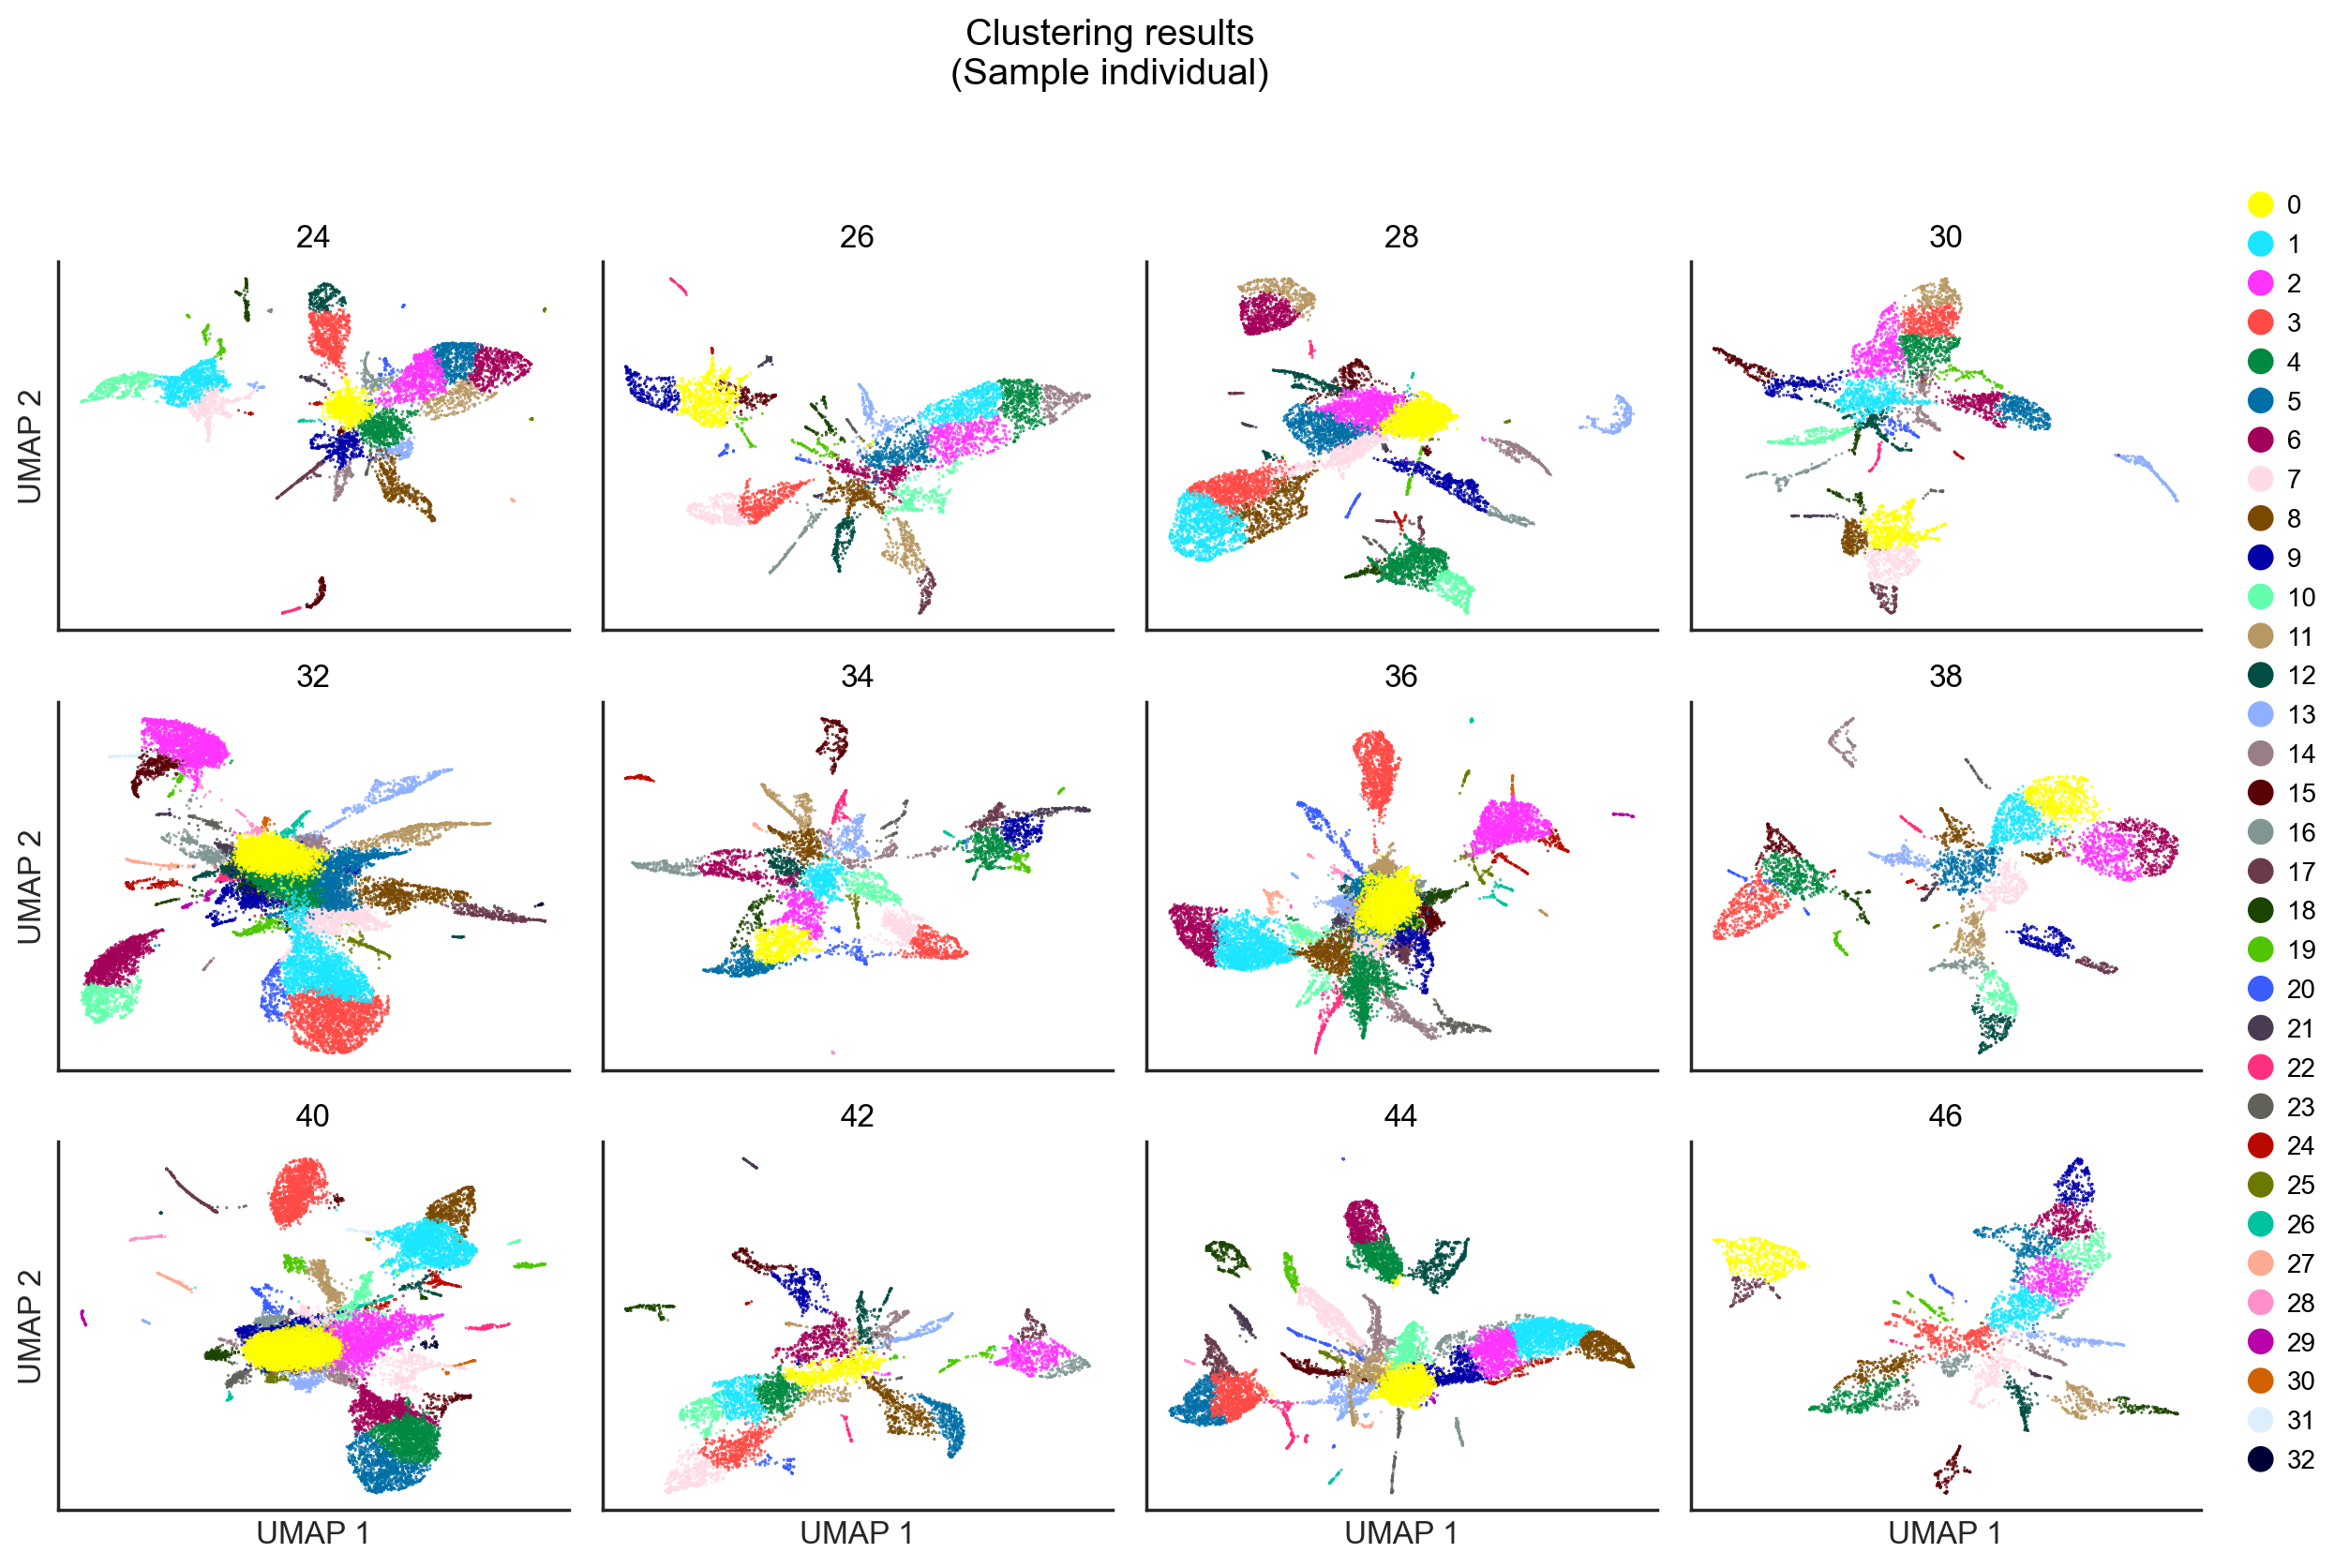

In [ ]:
singleCellTools.plotting.PlotAnndata(ad, 'sx').embedding(
    'X_umap_each_cluster', color='leiden_each_cluster', groupby='CT', wrap=4, size=0.3, figsize=(12, 8), title='Clustering results\n(Sample individual)', share=False
)[1]

# SCT (Batch level)

In [ ]:
ad_1 = ad[ad.obs.loc[lambda _: _['Batch'] == '1'].index].copy()
ad_2 = ad[ad.obs.loc[lambda _: _['Batch'] == '2'].index].copy()

In [ ]:
singleCellTools.normalize.normalizeBySCT_r(
    ad_2, layer='sx', returnOnlyVarGenes=True, runSctOnly=True
)

2023-11-23 19:15:46 - WARNING - R[write to console]: Warning:
2023-11-23 19:15:46 - WARNING - R[write to console]:  Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca_10_ to pca10_

2023-11-23 19:15:46 - WARNING - R[write to console]: Warning:
2023-11-23 19:15:46 - WARNING - R[write to console]:  All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pca10_

2023-11-23 19:15:47 - WARNING - R[write to console]: Warning:
2023-11-23 19:15:47 - WARNING - R[write to console]:  Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca_30_sx_ to pca30sx_

2023-11-23 19:15:47 - WARNING - R[write to console]: Warning:
2023-11-23 19:15:47 - WARNING - R[write to console]:  All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pca30sx_

2023-11-23 19:15:49 - WARNING - R[write to console]: Warning:
2023-11-23 19:15:49 -

  |======================================================================| 100%


2023-11-23 19:17:03 - WARNING - R[write to console]: Setting estimate of  356 genes to inf as theta_mm/theta_mle < 1e-3

2023-11-23 19:17:03 - WARNING - R[write to console]: # of step1 poisson genes (variance < mean): 0

2023-11-23 19:17:03 - WARNING - R[write to console]: # of low mean genes (mean < 0.001): 2844

2023-11-23 19:17:03 - WARNING - R[write to console]: Total # of Step1 poisson genes (theta=Inf; variance < mean): 403

2023-11-23 19:17:03 - WARNING - R[write to console]: Total # of poisson genes (theta=Inf; variance < mean): 3297

2023-11-23 19:17:03 - WARNING - R[write to console]: Calling offset model for all 3297 poisson genes

2023-11-23 19:17:03 - WARNING - R[write to console]: Found 470 outliers - those will be ignored in fitting/regularization step


2023-11-23 19:17:03 - WARNING - R[write to console]: Ignoring theta inf genes

2023-11-23 19:17:05 - WARNING - R[write to console]: Replacing fit params for 3297 poisson genes by theta=Inf

2023-11-23 19:17:08 - WARNING 

  |======================================================================| 100%


2023-11-23 19:20:16 - WARNING - R[write to console]: Computing corrected count matrix for 23633 genes



  |======================================================================| 100%


2023-11-23 19:27:07 - WARNING - R[write to console]: Calculating gene attributes

2023-11-23 19:27:33 - WARNING - R[write to console]: Wall clock passed: Time difference of 11.18522 mins

2023-11-23 19:27:33 - WARNING - R[write to console]: Determine variable features

2023-11-23 19:27:37 - WARNING - R[write to console]: Place corrected count matrix in counts slot

2023-11-23 19:27:50 - WARNING - R[write to console]: Centering data matrix

  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |==================                                                    |  25%
  |                                                                            
  |===================================                                   |  50%
  |                                                                         

AnnData object with n_obs × n_vars = 36885 × 24503
    obs: 'ambientRnaFractionEstimatedBySoupx', 'Sample', 'CT', 'n_genes', 'n_counts', 'percent_ct', 'outlier', 'Batch', 'leiden', 'prev_celltype', 'Cluster', 'celltype', 'leiden_0.05', 'leiden_0.1', 'leiden_0.15', 'leiden_0.2', 'leiden_0.25', 'leiden_0.3', 'leiden_0.35', 'leiden_0.4', 'leiden_0.45', 'leiden_0.5', 'leiden_0.55', 'leiden_0.6', 'leiden_0.65', 'leiden_0.7', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_1.0', 'leiden_1.05', 'leiden_1.1', 'leiden_1.15', 'leiden_1.2', 'leiden_1.25', 'leiden_1.3', 'leiden_1.35', 'leiden_1.4', 'leiden_1.45', 'leiden_1.5', 'leiden_subcluster', 'recluster_ct', 'temp_batch', 'temp_split', 'leiden_mask_all_circadian', 'leiden_harmony_each_sample', 'leiden_each_cluster', 'AT3G09600', 'AT3G54500', 'AT2G46830', 'AT5G02810', 'AT1G01060', 'AT5G61380', 'AT5G64170', 'AT5G60100', 'AT1G22770', 'AT5G02840', 'AT2G25930', 'AT2G46790', 'AT2G40080', 'AT5G24470', 'AT5G59570', 'A

In [ ]:
singleCellTools.normalize.normalizeBySCT_r(
    ad_1, layer='sx', returnOnlyVarGenes=True, runSctOnly=True
)

2023-11-23 19:29:07 - WARNING - R[write to console]: Warning:
2023-11-23 19:29:07 - WARNING - R[write to console]:  Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca_10_ to pca10_

2023-11-23 19:29:07 - WARNING - R[write to console]: Warning:
2023-11-23 19:29:07 - WARNING - R[write to console]:  All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pca10_

2023-11-23 19:29:09 - WARNING - R[write to console]: Warning:
2023-11-23 19:29:09 - WARNING - R[write to console]:  Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca_30_sx_ to pca30sx_

2023-11-23 19:29:09 - WARNING - R[write to console]: Warning:
2023-11-23 19:29:09 - WARNING - R[write to console]:  All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pca30sx_

2023-11-23 19:29:11 - WARNING - R[write to console]: Warning:
2023-11-23 19:29:11 -

  |======================================================================| 100%


2023-11-23 19:30:48 - WARNING - R[write to console]: Setting estimate of  592 genes to inf as theta_mm/theta_mle < 1e-3

2023-11-23 19:30:48 - WARNING - R[write to console]: # of step1 poisson genes (variance < mean): 0

2023-11-23 19:30:48 - WARNING - R[write to console]: # of low mean genes (mean < 0.001): 4568

2023-11-23 19:30:48 - WARNING - R[write to console]: Total # of Step1 poisson genes (theta=Inf; variance < mean): 633

2023-11-23 19:30:48 - WARNING - R[write to console]: Total # of poisson genes (theta=Inf; variance < mean): 4851

2023-11-23 19:30:48 - WARNING - R[write to console]: Calling offset model for all 4851 poisson genes

2023-11-23 19:30:48 - WARNING - R[write to console]: Found 823 outliers - those will be ignored in fitting/regularization step


2023-11-23 19:30:48 - WARNING - R[write to console]: Ignoring theta inf genes

2023-11-23 19:30:50 - WARNING - R[write to console]: Replacing fit params for 4851 poisson genes by theta=Inf

2023-11-23 19:31:01 - WARNING 

  |======================================================================| 100%


2023-11-23 19:39:48 - WARNING - R[write to console]: Computing corrected count matrix for 24437 genes



  |======================================================================| 100%


2023-11-23 19:58:39 - WARNING - R[write to console]: Calculating gene attributes

2023-11-23 20:00:13 - WARNING - R[write to console]: Wall clock passed: Time difference of 30.3632 mins

2023-11-23 20:00:13 - WARNING - R[write to console]: Determine variable features

2023-11-23 20:00:24 - WARNING - R[write to console]: Place corrected count matrix in counts slot

2023-11-23 20:00:53 - WARNING - R[write to console]: Centering data matrix

  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |==================                                                    |  25%
  |                                                                            
  |===================================                                   |  50%
  |                                                                          

AnnData object with n_obs × n_vars = 94267 × 24503
    obs: 'ambientRnaFractionEstimatedBySoupx', 'Sample', 'CT', 'n_genes', 'n_counts', 'percent_ct', 'outlier', 'Batch', 'leiden', 'prev_celltype', 'Cluster', 'celltype', 'leiden_0.05', 'leiden_0.1', 'leiden_0.15', 'leiden_0.2', 'leiden_0.25', 'leiden_0.3', 'leiden_0.35', 'leiden_0.4', 'leiden_0.45', 'leiden_0.5', 'leiden_0.55', 'leiden_0.6', 'leiden_0.65', 'leiden_0.7', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_1.0', 'leiden_1.05', 'leiden_1.1', 'leiden_1.15', 'leiden_1.2', 'leiden_1.25', 'leiden_1.3', 'leiden_1.35', 'leiden_1.4', 'leiden_1.45', 'leiden_1.5', 'leiden_subcluster', 'recluster_ct', 'temp_batch', 'temp_split', 'leiden_mask_all_circadian', 'leiden_harmony_each_sample', 'leiden_each_cluster', 'AT3G09600', 'AT3G54500', 'AT2G46830', 'AT5G02810', 'AT1G01060', 'AT5G61380', 'AT5G64170', 'AT5G60100', 'AT1G22770', 'AT5G02840', 'AT2G25930', 'AT2G46790', 'AT2G40080', 'AT5G24470', 'AT5G59570', 'A

In [ ]:
ls_hvg = singleCellTools.normalize.getHvgGeneFromSctAdata([ad_1, ad_2])[0]

In [ ]:
singleCellTools.normalize.getSctResiduals(ad_1, ls_hvg, layer='sx', forceOverwrite=True)
singleCellTools.normalize.getSctResiduals(ad_2, ls_hvg, layer='sx', forceOverwrite=True)

2023-11-23 20:08:22 - WARNING - R[write to console]: Setting min_variance based on median UMI:  0.04

2023-11-23 20:08:22 - WARNING - R[write to console]: Calculating residuals of type pearson for 3000 genes



  |======================================================================| 100%


2023-11-23 20:14:08 - WARNING - R[write to console]: Setting min_variance based on median UMI:  0.04

2023-11-23 20:14:09 - WARNING - R[write to console]: Calculating residuals of type pearson for 3000 genes



  |======================================================================| 100%


In [ ]:
ad_test = sc.AnnData(pd.concat([ad_1.obsm['sct_residual'], ad_2.obsm['sct_residual']]))

In [ ]:
ad_test = ad_test[ad.obs.index]

In [ ]:
ad_test.obs = ad.obs.copy()

In [ ]:
ad_test.layers['sct'] = ad_test.X.copy()

In [ ]:
ad_test.var['highly_variable'] = True

In [ ]:
sc.tl.pca(ad_test)

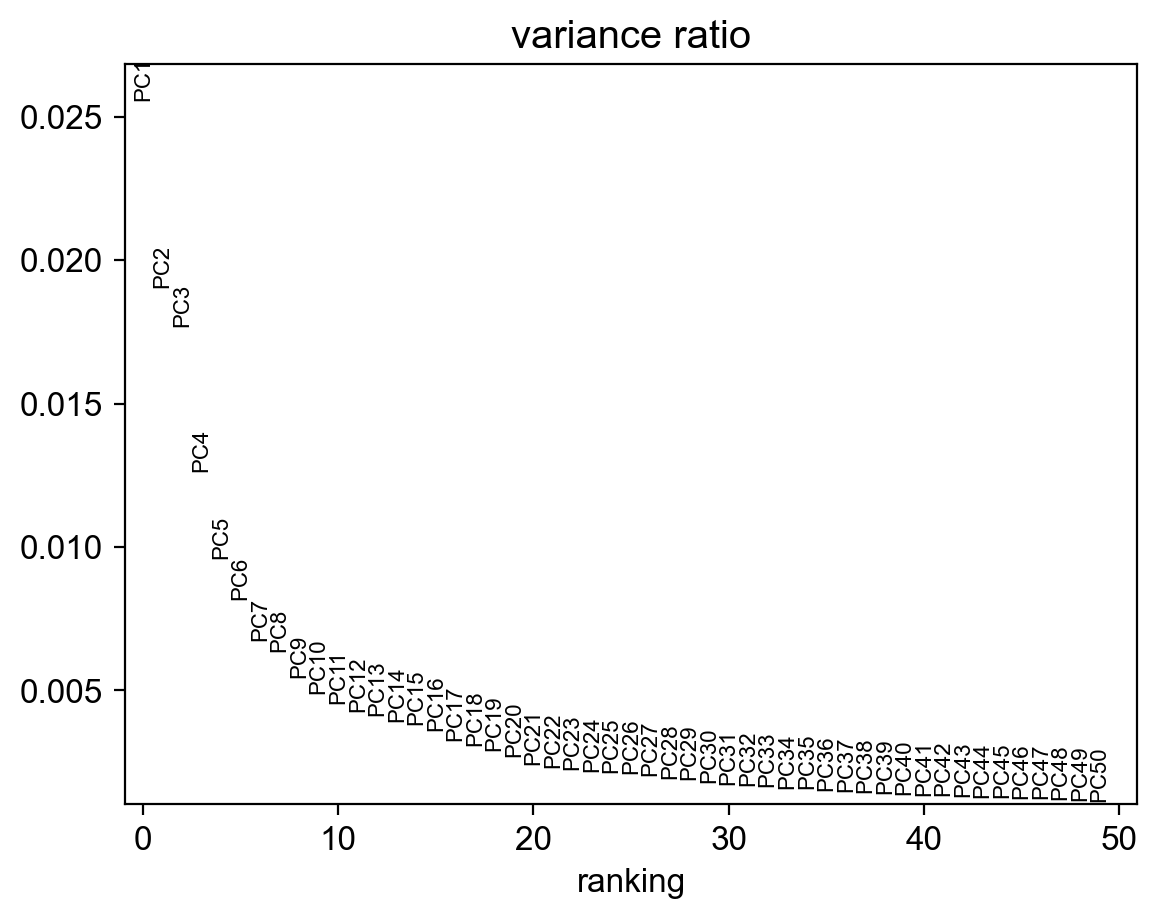

In [ ]:
sc.pl.pca_variance_ratio(ad_test, 50)

In [ ]:
sc.pp.neighbors(ad_test, n_pcs=30)

In [ ]:
sc.tl.umap(ad_test, 0.3)

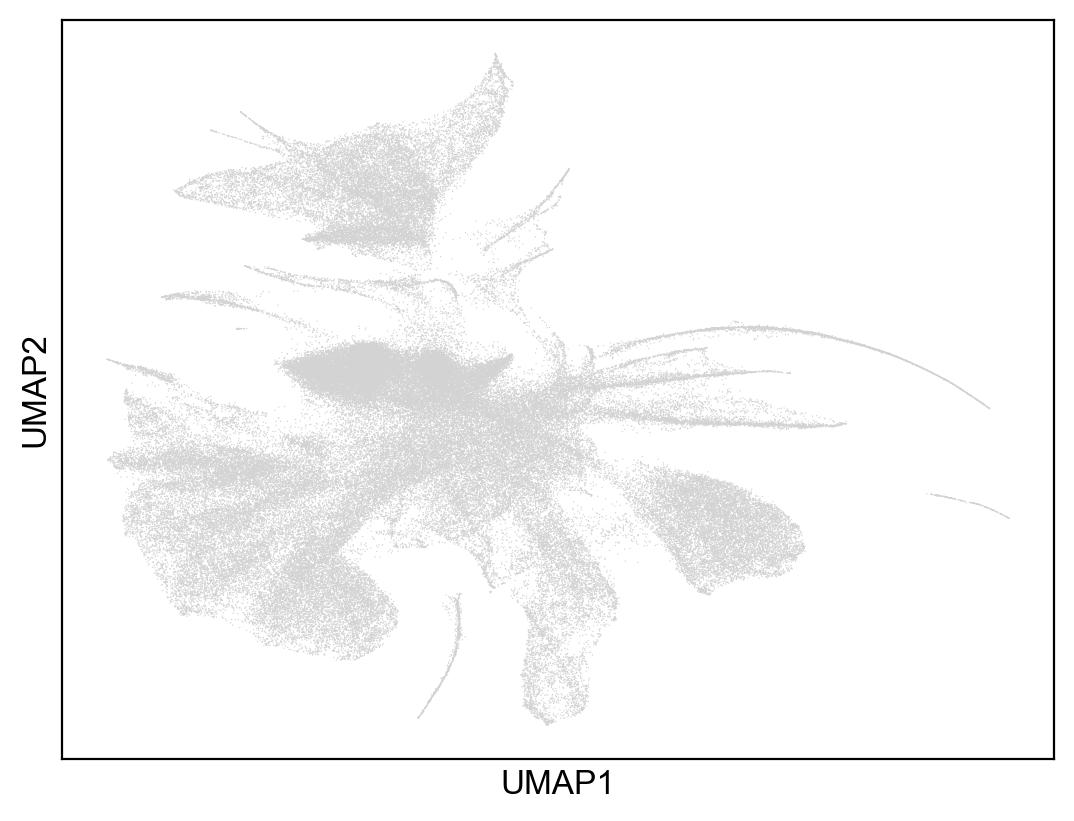

In [ ]:
sc.pl.umap(ad_test)

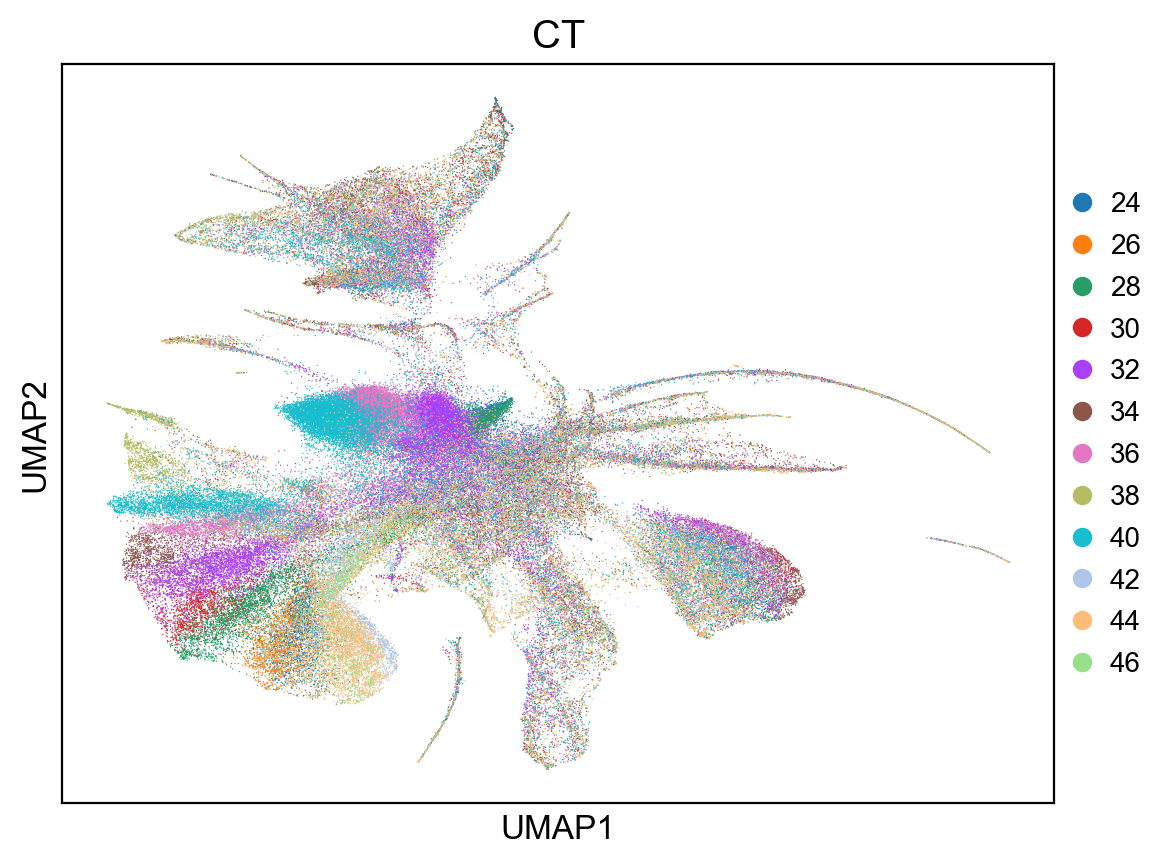

In [ ]:
sc.pl.umap(ad_test, color="CT")

In [ ]:
ad.obsm['X_pca_sct_batch'] = ad_test.obsm['X_pca']

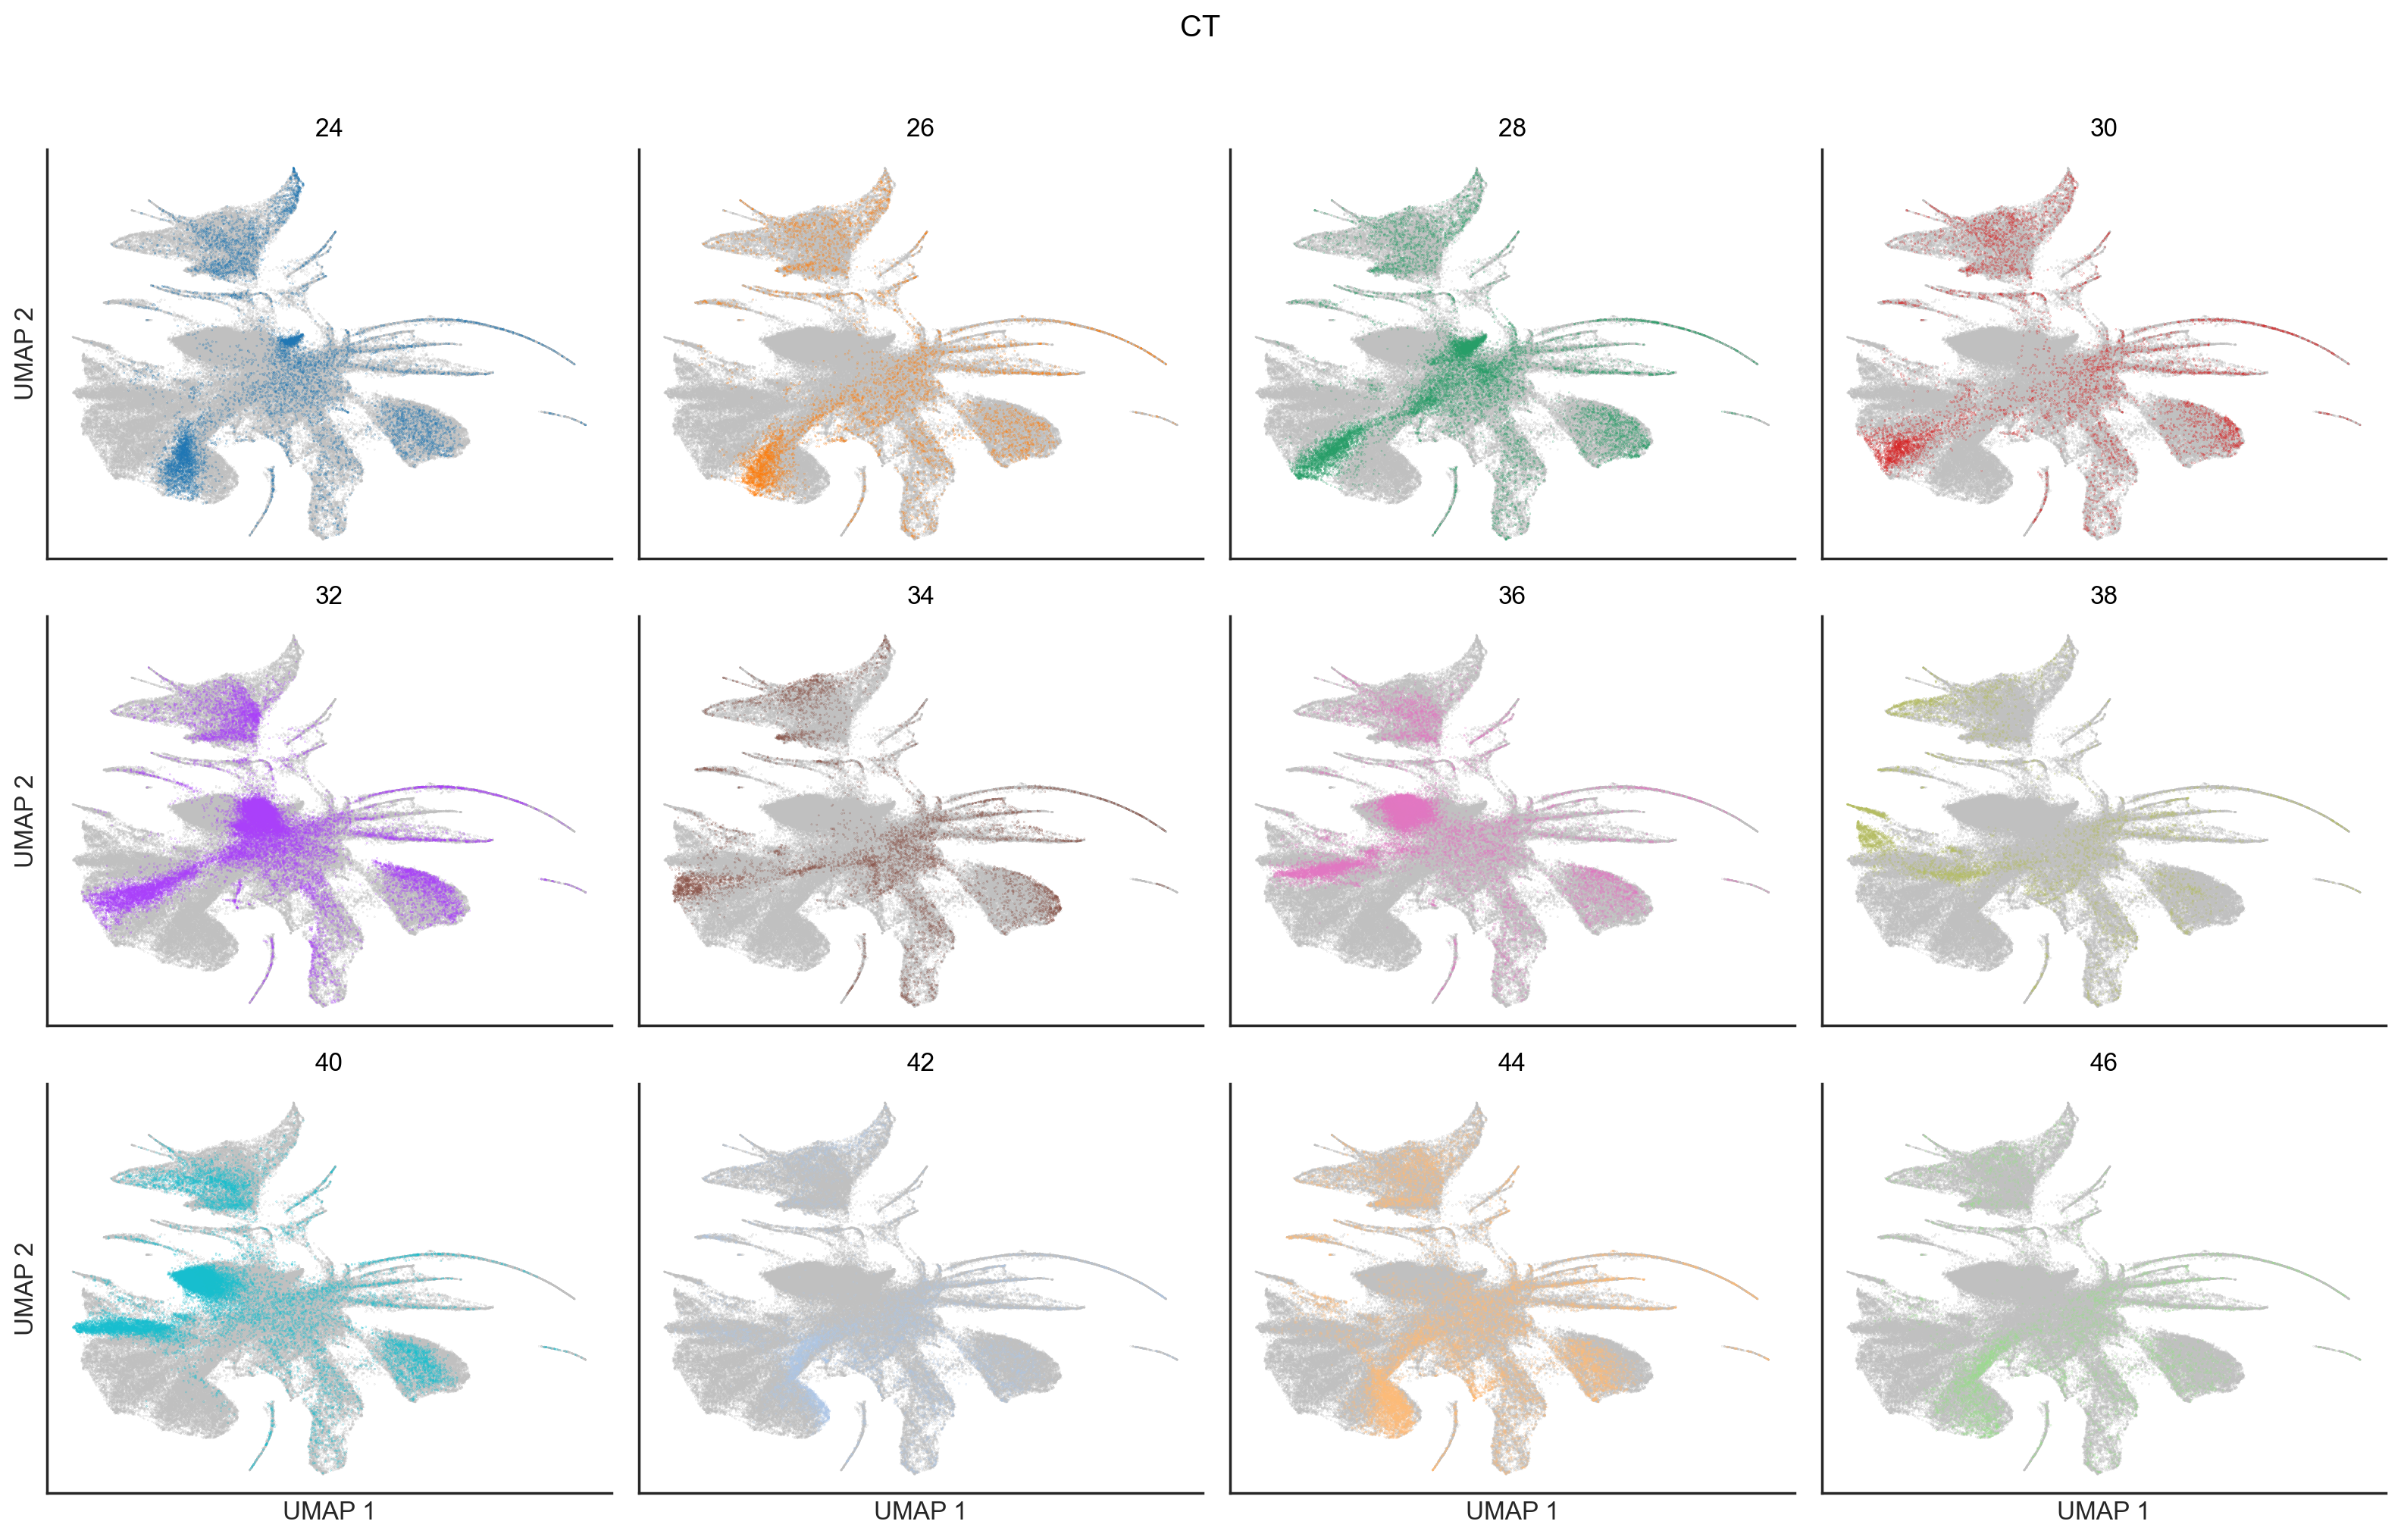

In [ ]:
singleCellTools.plotting.PlotAnndata(ad_test, 'sx').embedding('umap', color='CT', wrap=4, figsize=(16,10), groupby='CT', addBackground=True, size=0.1, needLegend=False)[1]